In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pathlib
import os
import copy
import datetime
import time
# sklearn?

import seaborn as sns
sns.set_style()

In [4]:
data=pd.read_csv("Data/Preprocessed_Data_with_Label.csv", sep=',',encoding='utf8')

In [5]:
ponderated_df=data.copy(deep=True)

for i in range (101, 317):
    for column in data.columns:
        if ("{}".format(i) in column)and ("ANSWER" in column):
            new_column=data[column]*data["ANSCOUNT_{}".format(i)] #check the syntax
            ponderated_df[column]=new_column

In [6]:
want_leave = data[data['ANSWER1_163']>40]

In [7]:
len(ponderated_df['DEMCODE'].unique()) == len(want_leave['DEMCODE'].unique())

True

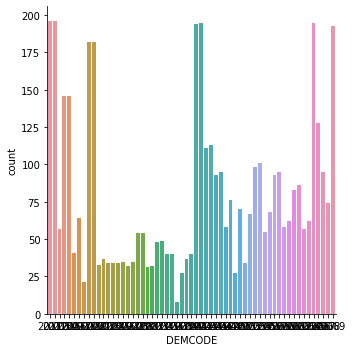

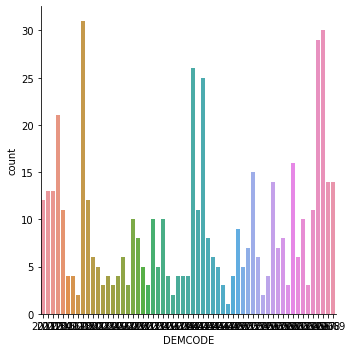

In [8]:
sns.catplot(data=data, x='DEMCODE', kind='count')
sns.catplot(data=want_leave, x='DEMCODE', kind='count')

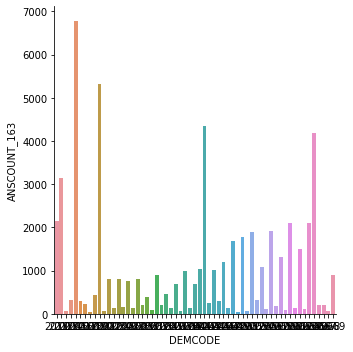

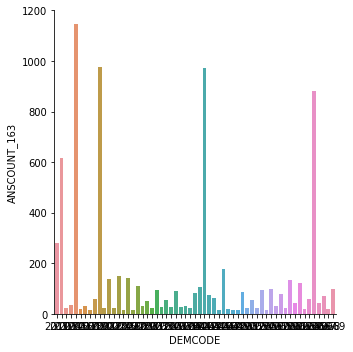

In [9]:
sns.catplot(data=data, x='DEMCODE', y='ANSCOUNT_163', kind='bar', ci=None)
sns.catplot(data=want_leave, x='DEMCODE',y='ANSCOUNT_163', kind='bar', ci=None)

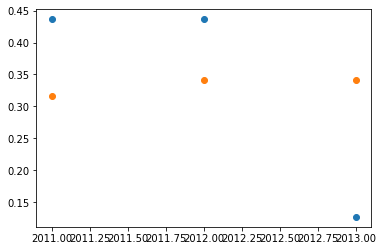

In [10]:
count = [data[data['DEMCODE']==2011]['DEMCODE'].count(),data[data['DEMCODE']==2012]['DEMCODE'].count(),data[data['DEMCODE']==2013]['DEMCODE'].count()]
count_bis = [want_leave[want_leave['DEMCODE']==2011]['DEMCODE'].count(),want_leave[want_leave['DEMCODE']==2012]['DEMCODE'].count(),want_leave[want_leave['DEMCODE']==2013]['DEMCODE'].count()]
plt.scatter([2011, 2012, 2013], count/sum(count))
plt.scatter([2011, 2012, 2013], count_bis/sum(count_bis))

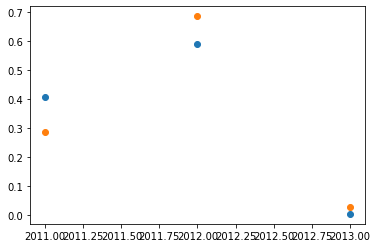

In [11]:
count = [data[data['DEMCODE']==2011]['ANSCOUNT_163'].sum(),data[data['DEMCODE']==2012]['ANSCOUNT_163'].sum(),data[data['DEMCODE']==2013]['ANSCOUNT_163'].sum()]
count_bis = [want_leave[want_leave['DEMCODE']==2011]['ANSCOUNT_163'].sum(),want_leave[want_leave['DEMCODE']==2012]['ANSCOUNT_163'].sum(),want_leave[want_leave['DEMCODE']==2013]['ANSCOUNT_163'].sum()]
plt.scatter([2011, 2012, 2013], count/sum(count))
plt.scatter([2011, 2012, 2013], count_bis/sum(count_bis))

In [26]:
want_leave.columns

Index(['ID', 'ANSWER1_101', 'ANSWER2_101', 'ANSWER3_101', 'ANSWER4_101',
       'ANSWER5_101', 'ANSWER6_101', 'ANSWER7_101', 'ANSCOUNT_101',
       'INDICATORID_101',
       ...
       'ANSWER4_316', 'ANSWER5_316', 'ANSWER6_316', 'ANSWER7_316',
       'ANSCOUNT_316', 'INDICATORID_316', 'SUBINDICATORID_316', 'LEVEL1ID',
       'SURVEYR', 'DEMCODE'],
      dtype='object', length=1660)

In [16]:
want_leave[want_leave['DEMCODE']==2013]['SURVEYR'].value_counts()

2018    6
2019    4
2020    3
Name: SURVEYR, dtype: int64

In [43]:
want_leave[want_leave['DEMCODE']==2015][['LEVEL1ID','SURVEYR']]

,LEVEL1ID,SURVEYR
233,53,2020
2620,14,2019
2627,21,2019
2632,26,2019
2633,28,2019
2644,53,2019
2649,78,2019
4220,21,2018
4221,22,2018
4224,26,2018


In [50]:
want_leave[want_leave['DEMCODE']==2015][['ANSWER%d_164'%i for i in range(1,7)]]

,ANSWER1_164,ANSWER2_164,ANSWER3_164,ANSWER4_164,ANSWER5_164,ANSWER6_164
233,6,29,55,3,2,4
2620,9,54,16,5,10,5
2627,9,20,48,2,13,8
2632,7,24,52,3,7,7
2633,0,0,0,0,0,0
2644,5,33,50,2,6,4
2649,0,0,0,0,0,0
4220,0,0,0,0,0,0
4221,9,28,42,5,8,8
4224,9,28,47,4,5,7


(0.0, 100.0)

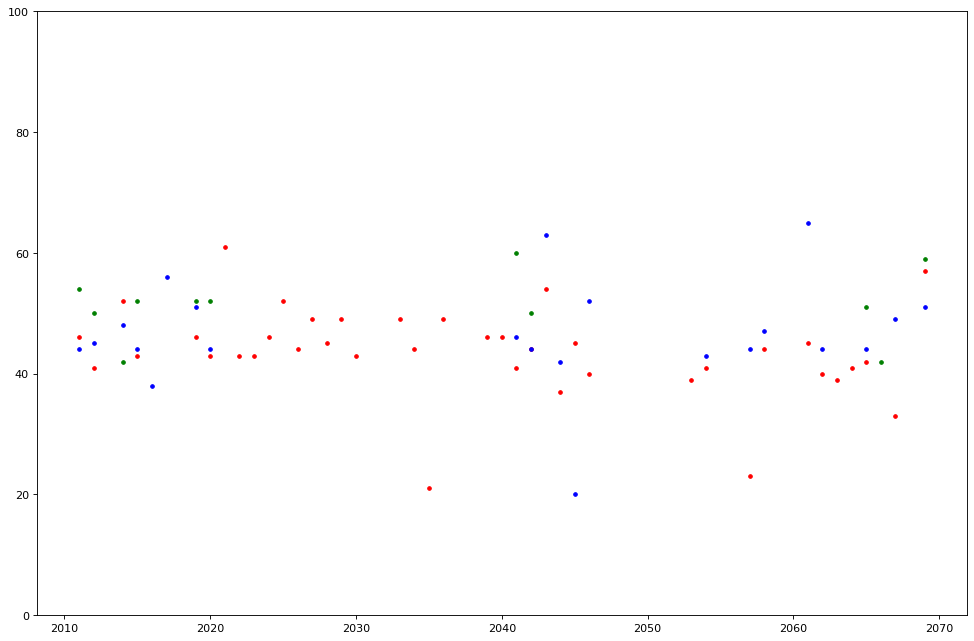

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

d = data[data['LEVEL1ID']==53]

d2 = d[d['SURVEYR']==2020]
plt.scatter(d2['DEMCODE'], d2['ANSWER1_163'], c='r', s=10)
d2 = d[d['SURVEYR']==2019]
plt.scatter(d2['DEMCODE'], d2['ANSWER1_163'], c='b', s=10)
d2 = d[d['SURVEYR']==2018]
plt.scatter(d2['DEMCODE'], d2['ANSWER1_163'], c='g', s=10)
plt.ylim((0,100))